# OpenCV – Open Source Computer Vision.
It is one of the most widely used tools for computer vision and image processing tasks.
* face detection
* video capturing
* tracking moving objects
* object disclosure
* face mask detection
* social distancing

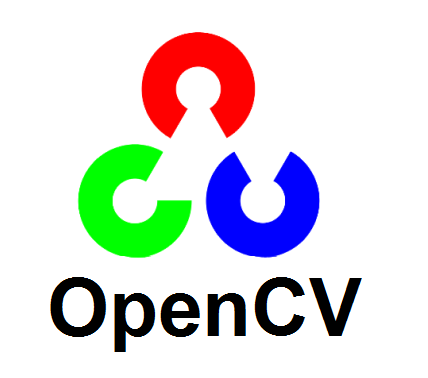

## Installation

In [1]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
    --------------------------------------- 0.5/39.0 MB 1.3 MB/s eta 0:00:30
    --------------------------------------- 0.8/39.0 MB 1.4 MB/s eta 0:00:27
   - -------------------------------------- 1.0/39.0 MB 1.5 MB/s eta 0:00:26
   - -------------------------------------- 1.6/39.0 MB 1.7 MB/s eta 0:00:22
   -- ------------------------------------- 2.1/39.0 MB 1.8 MB/s eta 0:00:21
   -- ------------------------------------- 2.6/39.0 MB 1.9 MB/s eta 0:00:20
   -- ------------------------------------- 2.9/39.0 MB 1.9 MB/s eta 0:00:20
   --- ------------------------------------ 3.4/39.0 MB 2.0 MB/s eta 0:00:19
   --- ------------------------------------ 3.4/39.0 MB 2.0 MB/s eta 0:00:19
   ---- ----------------------------------- 3.9/39.0 MB 1.9 MB/s eta 0:00:19
   ---- ----

## Image Types



*   RGB images
*   Gray style images
*   Binary images
*   Multispectral images





File exists: C:\Users\Mohammad\Desktop\Bootcamp\OpenCV\OpenCV_handsOn\img1.png
Type: <class 'numpy.ndarray'>
Image loaded successfully.


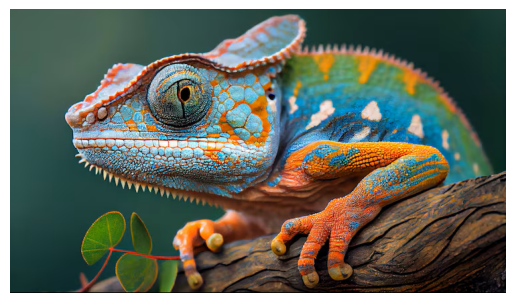

In [1]:
import cv2
import matplotlib.pyplot as plt
import os

# Define image path
img_path = r"C:\Users\Mohammad\Desktop\Bootcamp\OpenCV\OpenCV_handsOn\img1.png"

# 1. Check if file exists
if not os.path.exists(img_path):
    print(f"File not found at: {img_path}")
else:
    print(f"File exists: {img_path}")

    # 2. Try to read the image
    img = cv2.imread(img_path)
    print("Type:", type(img))
    # print("Value:", img)
    if img is None:
        print(" OpenCV could not read the image")
    else:
        print("Image loaded successfully.")

        # 3. Convert BGR → RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # 4. Show with matplotlib
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.show()


In [2]:
img = cv2.imread(img_path, 0)
print(img.shape)

(423, 740)


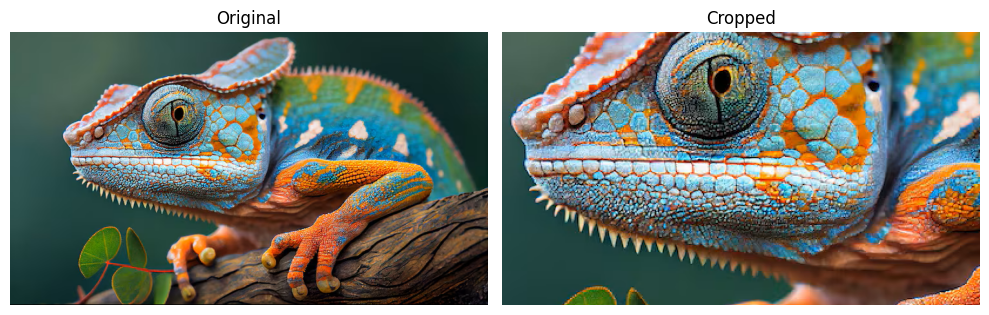

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))  # or (20, 20) if you prefer large figures

# Original image
plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(img)
plt.axis('off')

# Image dimensions
hgt, wdt = img.shape[:2]

# Define crop region: 25% to 75% in both dimensions
start_row, start_col = int(hgt * 0.20), int(wdt * 0.10)
end_row, end_col = int(hgt * 0.75), int(wdt * 0.65)

cropped = img[start_row:end_row, start_col:end_col]

# Cropped image
plt.subplot(2, 2, 2)
plt.title("Cropped")
plt.imshow(cropped)
plt.axis('off')

plt.tight_layout()
plt.show()

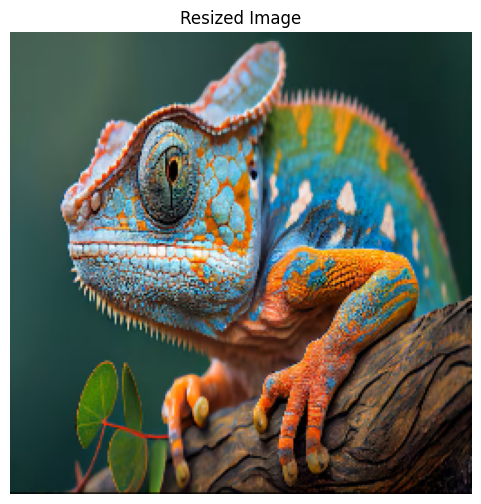

In [4]:
# new size
new_width, new_height = 256, 256

# resize image
resized = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

#output
plt.figure(figsize=(6, 6))
plt.imshow(resized)
plt.axis('off')
plt.title('Resized Image')
plt.show()

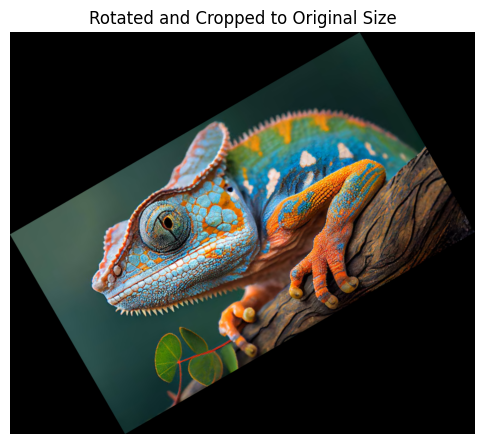

In [5]:
import numpy as np

(h, w) = img.shape[:2]
center = (w // 2, h // 2)
angle = 30

# Make rotation matrix
M = cv2.getRotationMatrix2D(center, angle, 1.0)

# Compute size of the rotated image and perform the rotation
cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])
nW = int((h * sin) + (w * cos))
nH = int((h * cos) + (w * sin))

M[0, 2] += (nW / 2) - center[0]
M[1, 2] += (nH / 2) - center[1]

rotated = cv2.warpAffine(img, M, (nW, nH))

plt.figure(figsize=(6, 6))
plt.imshow(rotated)
plt.axis('off')
plt.title('Rotated and Cropped to Original Size')
plt.show()

## Thresholding

Thresholding is an image segmentation method. It compares pixel values with a threshold value and updates it accordingly. OpenCV supports multiple variations of thresholding. A simple thresholding function can be defined like this:

if Image(x,y) > threshold , Image(x,y) = 1

otherswise, Image(x,y) = 0

### Simple Thresholding

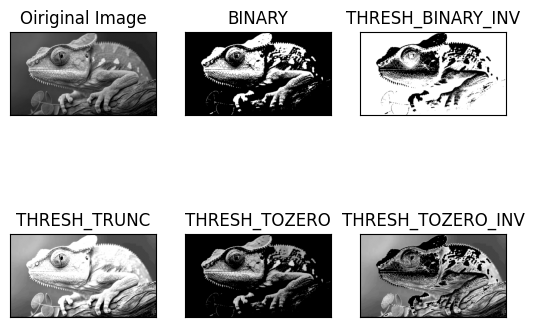

In [6]:
#importing the required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt


#here 0 means that the image is loaded in gray scale format
gray_image = cv2.imread(img_path,0)

ret,thresh_binary = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
ret,thresh_binary_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)
ret,thresh_trunc = cv2.threshold(gray_image,127,255,cv2.THRESH_TRUNC)
ret,thresh_tozero = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO)
ret,thresh_tozero_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO_INV)

#DISPLAYING THE DIFFERENT THRESHOLDING STYLES
names = ['Oiriginal Image','BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = gray_image,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])

plt.show()

### Adaptive Thresholding

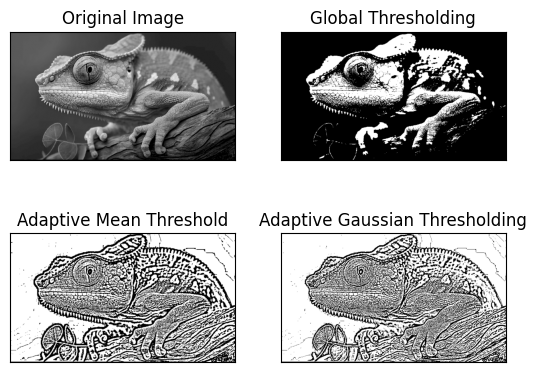

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#ADAPTIVE THRESHOLDING
gray_image = cv2.imread(img_path,0)

ret,thresh_global = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
#here 11 is the pixel neighbourhood that is used to calculate the threshold value
thresh_mean = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

thresh_gaussian = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

names = ['Original Image','Global Thresholding','Adaptive Mean Threshold','Adaptive Gaussian Thresholding']
images = [gray_image,thresh_global,thresh_mean,thresh_gaussian]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])

plt.show()

## Edge Detection
Edges are the points in an image where the image brightness changes sharply or has discontinuities. Such discontinuities generally correspond to:

* Discontinuities in depth
* Discontinuities in surface orientation
* Changes in material properties
* Variations in scene illumination

Edges are very useful features of an image that can be used for different applications like classification of objects in the image and localization. Even deep learning models calculate edge features to extract information about the objects present in image.

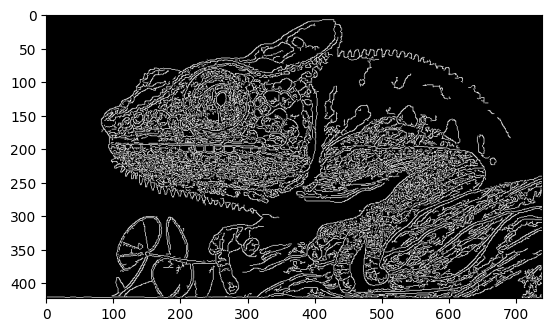

In [8]:
#import the required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
#read the image
image = cv2.imread(img_path)
#calculate the edges using Canny edge algorithm
edges = cv2.Canny(image,10,300)

img_output = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)
#plot the edges
plt.imshow(img_output)

## To Do:
Based on what you learned from the OpenCV library, implement code that only captures the edge of the chameleon as much as you can.

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import convolve2d as conv2

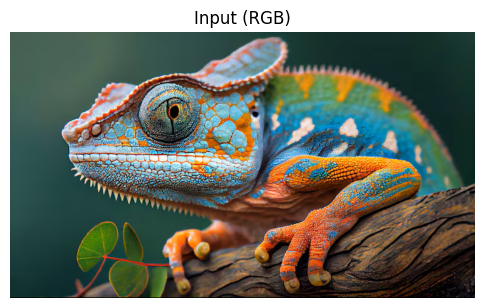

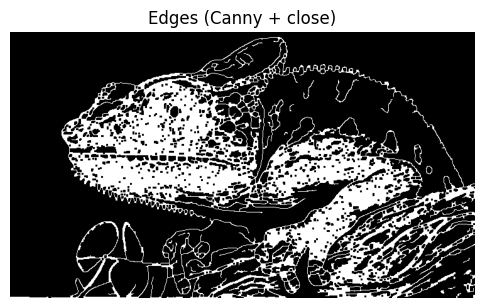

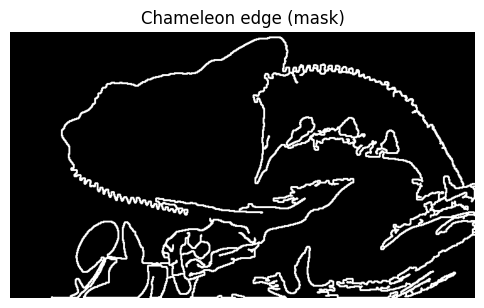

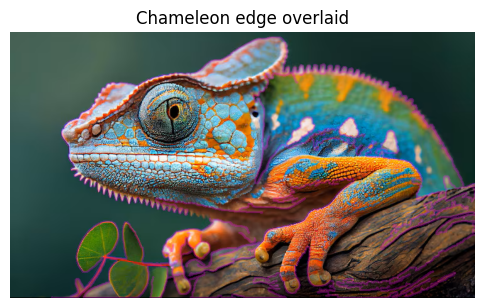

In [10]:

img_path =r"C:\Users\Mohammad\Desktop\Bootcamp\OpenCV\OpenCV_handsOn\img1.png"   

try:
    import cv2
    CV2_AVAILABLE = True
except Exception:
    CV2_AVAILABLE = False

def imshow(title, img, cmap=None, size=(6,4)):
    plt.figure(figsize=size)
    plt.title(title)
    if img.ndim == 2:
        plt.imshow(img, cmap=cmap or "gray")
    else:
        plt.imshow(img)
    plt.axis("off")
    plt.show()

def load_rgb(img_path):
    """Load image as RGB ndarray. Tries OpenCV first, falls back to PIL. """
    if img_path and os.path.exists(img_path) and CV2_AVAILABLE:
        bgr = cv2.imread(img_path, cv2.IMREAD_COLOR)
        if bgr is not None:
            return cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    # PIL fallback or missing path
    if img_path and os.path.exists(img_path):
        return np.array(Image.open(img_path).convert("RGB"))
    # Last resort: synthetic image (if you created one earlier)
    synth = np.zeros((420, 640, 3), np.uint8)
    # Write a message so you remember to set the path
    cv2.putText(synth, "Set chameleon_path to your file", (20, 210), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255), 2)
    return synth

img_rgb = load_rgb(img_path)
imshow("Input (RGB)", img_rgb)

# --- Preprocessing: gentle smoothing, contrast normalization ---
if CV2_AVAILABLE:
    # Convert to BGR for some OpenCV ops, then to GRAY
    bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)

    # (1) Bilateral filter to preserve edges while denoising
    bgr_smooth = cv2.bilateralFilter(bgr, d=9, sigmaColor=60, sigmaSpace=60)

    # (2) Convert to gray
    gray = cv2.cvtColor(bgr_smooth, cv2.COLOR_BGR2GRAY)

    # (3) Contrast Limited Adaptive Histogram Equalization (helps with low contrast textures)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray_eq = clahe.apply(gray)

    # --- Edge detection: auto Canny thresholds from intensity median ---
    v = np.median(gray_eq)
    lower = int(max(0, 0.66 * v))   
    upper = int(min(255, 1.33 * v)) 
    edges = cv2.Canny(gray_eq, lower, upper, L2gradient=True)

    # Optional: reinforce faint edges with a light Sobel magnitude OR morphological close
    kernel = np.ones((3,3), np.uint8)
    edges_closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=1)

    imshow("Edges (Canny + close)", edges_closed, cmap="gray")

    # --- Contour extraction: pick the most plausible chameleon outline ---
    cnt_src = edges_closed.copy()
    contours, _ = cv2.findContours(cnt_src, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Heuristic: choose the contour with the largest area but not filling the whole image
    H, W = cnt_src.shape[:2]
    img_area = H * W
    best = None
    best_area = 0
    for c in contours:
        a = cv2.contourArea(c)
        if 2000 < a < 0.9 * img_area and a > best_area:  # ignore tiny and near-full-frame blobs
            best = c
            best_area = a

    # Create a blank mask of the chosen contour's **edge** only
    edge_mask = np.zeros((H, W), np.uint8)
    if best is not None:
        # Draw the contour as a thin edge
        cv2.drawContours(edge_mask, [best], -1, color=255, thickness=2)

    imshow("Chameleon edge (mask)", edge_mask, cmap="gray")

    # Overlay the edge in color on the original image (coloreds edge)
    overlay = img_rgb.copy()
    # red = np.array([255, 30, 30], dtype=np.uint8)
    # overlay[edge_mask > 0] = red

    cyan = np.array([255, 0, 255], dtype=np.uint8)
    overlay[edge_mask > 0] = cyan
    # For a blended overlay, mix original and colored edge
    alpha = 0.75
    blended = (alpha * img_rgb + (1 - alpha) * overlay).astype(np.uint8)
    imshow("Chameleon edge overlaid", blended)

else:
    # Minimal PIL/NumPy fallback if OpenCV isn't available
    gray = (0.299*img_rgb[...,0] + 0.587*img_rgb[...,1] + 0.114*img_rgb[...,2]).astype(np.uint8)
    # Simple gradient-based edge (Sobel) via numpy (very rough fallback)
    Kx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    Ky = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    gx = conv2(gray, Kx, mode="same", boundary="symm")
    gy = conv2(gray, Ky, mode="same", boundary="symm")
    mag = np.hypot(gx, gy)
    mag = (mag / mag.max() * 255).astype(np.uint8)
    edge_mask = (mag > 80).astype(np.uint8) * 255
    imshow("Edges (fallback)", edge_mask, cmap="gray")


## Image Filtering

In image filtering, a pixel value is updated using its neighbouring values. But how are these values updated in the first place?

Well, there are multiple ways of updating pixel values, such as selecting the maximum value from neighbours, using the average of neighbours, etc. Each method has it’s own uses. For example, averaging the pixel values in a neighbourhood is used for image blurring.

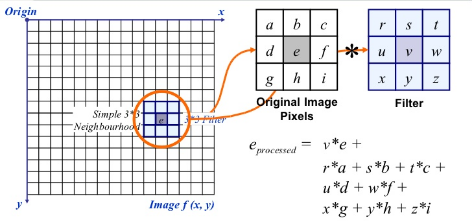

Gaussian filtering is also used for image blurring that gives different weights to the neighbouring pixels based on their distance from the pixel under consideration.

For image filtering, we use kernels. Kernels are matrices of numbers of different shapes like 3 x 3, 5 x 5, etc. A kernel is used to calculate the dot product with a part of the image. When calculating the new value of a pixel, the kernel center is overlapped with the pixel. The neighbouring pixel values are multiplied with the corresponding values in the kernel. The calculated value is assigned to the pixel coinciding with the center of the kernel.

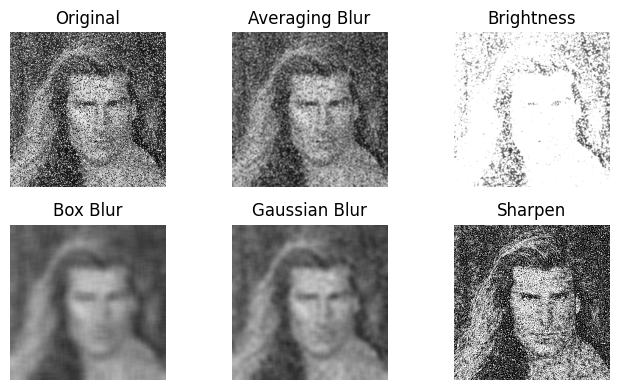

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("sp_img_gray_noise_heavy.png")

original_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 1. AVERAGING BLUR
averaging_kernel = np.ones((3, 3), np.float32) / 9
averaging_img = cv2.filter2D(img, -1, averaging_kernel)
averaging_rgb = cv2.cvtColor(averaging_img, cv2.COLOR_BGR2RGB)

# 2. BRIGHTNESS
brightness_kernel = np.ones((3, 3), np.float32) * 0.3
brightness_kernel[1, 1] = 1.1
bright_img = cv2.filter2D(img, -1, brightness_kernel)
bright_rgb = cv2.cvtColor(bright_img, cv2.COLOR_BGR2RGB)

# 3. BOX BLUR
box_blur_img = cv2.blur(img, (15, 15))
box_blur_rgb = cv2.cvtColor(box_blur_img, cv2.COLOR_BGR2RGB)

# 4. GAUSSIAN BLUR
gauss_img = cv2.GaussianBlur(img, (11, 11), 5)
gauss_rgb = cv2.cvtColor(gauss_img, cv2.COLOR_BGR2RGB)

# 5. SHARPEN
sharpen_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]], np.float32)
sharp_img = cv2.filter2D(img, -1, sharpen_kernel)
sharp_rgb = cv2.cvtColor(sharp_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(7, 4))

filters = [
    (original_rgb, 'Original'),
    (averaging_rgb, 'Averaging Blur'),
    (bright_rgb, 'Brightness'),
    (box_blur_rgb, 'Box Blur'),
    (gauss_rgb, 'Gaussian Blur'),
    (sharp_rgb, 'Sharpen')
]

for i, (img_rgb, title) in enumerate(filters):
    plt.subplot(2, 3, i+1)
    plt.imshow(img_rgb)
    plt.title(title, fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

## To Do:

In this exercise, you will write a simple Python code using OpenCV to apply different image processing filters on a noisy grayscale image. This will help you understand the differences and applications of each filter. By tweaking parameters, you'll see their effects and learn when to use each filter.

**Basic Concepts**

Filters in image processing are like magic brushes that modify pixels based on a small matrix called a kernel. Filters can:

* Reduce noise (like random speckles).
* Sharpen edges.
* Adjust brightness or contrast.

**Filters to Implement:**

1. Averaging Blur: Averages neighboring pixels (reduces noise, softens image).
2. Box Blur: Similar to Averaging, but with a larger kernel.
3. Gaussian Blur: Reduces noise naturally, preserves edges better.
4. Sharpen: Enhances edges (but may amplify noise).
5. Brightness: Increases image brightness/contrast.

**Input Image:**

 A grayscale image with heavy noise (e.g., salt-and-pepper noise) named `noisy_image.jpg`.


**Implementation Instructions**


1. Setup Environment:

    * Import OpenCV `(cv2)`, NumPy `(np)`, and Matplotlib `(plt)`.
    * Load the grayscale image using `cv2.imread('noisy_image.png', cv2.IMREAD_GRAYSCALE)`.
    * Check if the image loaded correctly; if not, print an error and exit.


2. Create Filters:

    * Averaging Blur:

      * Create a 3x3 kernel with all values 1/9.
      * Apply with `cv2.filter2D(image, -1, kernel)`.


    * Box Blur:

      * Use `cv2.blur(image, (15, 15))`.


    * Gaussian Blur:

      * Use `cv2.GaussianBlur(image, (11, 11), sigmaX=5)`.


    * Sharpen:

      * Create a 3x3 kernel: edges -1, center 9.
       Apply with `cv2.filter2D`.


    * Brightness:

      * Create a 3x3 kernel: all 0.3, center 1.1.
        Apply with `cv2.filter2D`.




3. Display Results:

   * Create a figure.
   * Show 6 images (original + 5 filters) in one.
   * Turn off axes.
   * Add titles.


4. Interactive Exercise:

   Change parameters for each filter:

   * Averaging: Try kernel sizes 5x5 or 7x7.
   * Box Blur: Try ksize (5,5) or (25,25).
   * Gaussian: Try sigmaX/sigmaY = 1 or 10.
   * Sharpen: Change center of kernel to 5 or 13.
   * Brightness: Adjust kernel weights (e.g., all 0.2, center 1.5).


   Observe changes in the output.


5. Analysis Questions:

    * Answer these to understand the filters:
    * Which filter removed noise best? Why?
    * What did Sharpen do? When should we avoid it?
    * What’s the difference between Gaussian and Box Blur? Which preserved edges better?
    * How did Brightness change the image? Where is it useful?
    * What happened when you increased the kernel size?

Loaded: noisy_image.jpg shape=(720, 960)


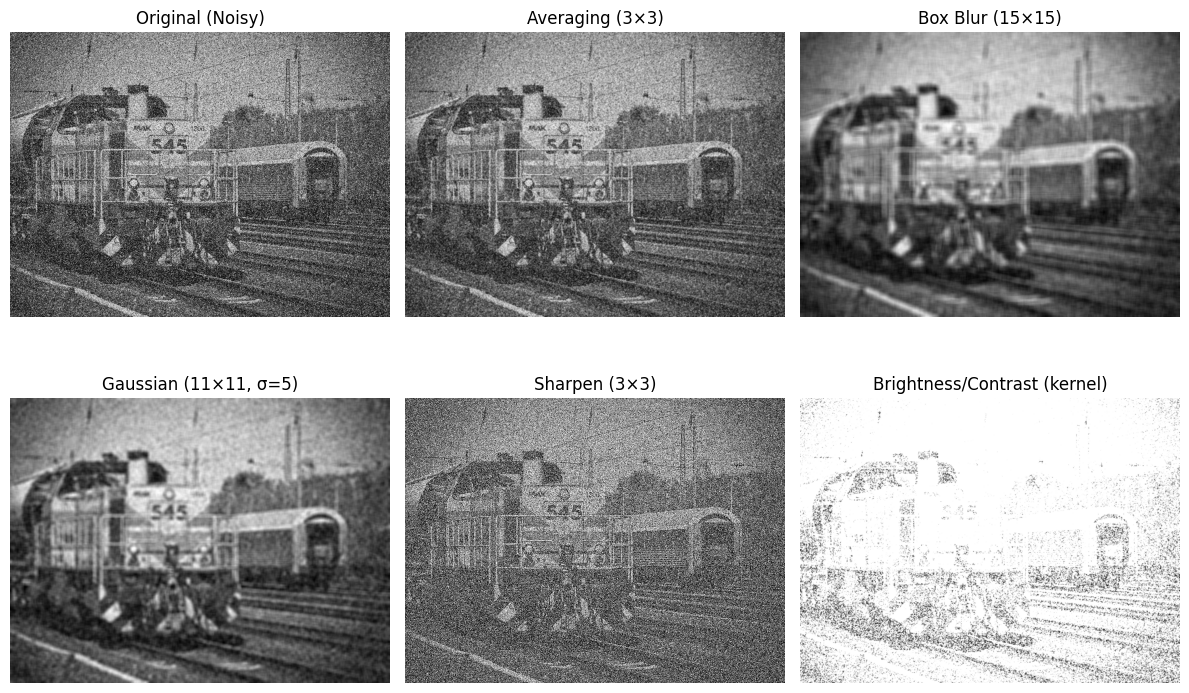

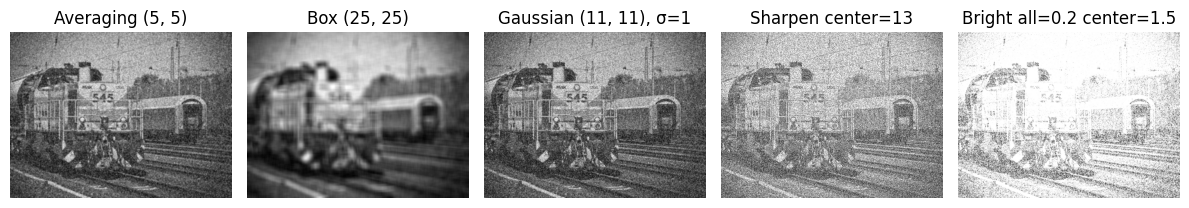

In [12]:
#To Do

def load_noisy_gray():
    for fname in ["noisy_image.jpg", "noisy_image.png"]:
        if os.path.exists(fname):
            img = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                print(f"Loaded: {fname} shape={img.shape}")
                return img
    print("No 'noisy_image.jpg/.png' found — creating a synthetic noisy image.")
    # Synthetic grayscale base with a soft gradient + text
    H, W = 360, 480
    base = np.tile(np.linspace(40, 220, W, dtype=np.uint8), (H,1))
    cv2.putText(base, "NOISY", (70, 190), cv2.FONT_HERSHEY_SIMPLEX, 2, 180, 3, cv2.LINE_AA)
    # Add salt & pepper noise
    rng = np.random.default_rng(7)
    sp_mask = rng.random((H, W))
    noisy = base.copy()
    noisy[sp_mask < 0.02] = 0
    noisy[(sp_mask >= 0.02) & (sp_mask < 0.04)] = 255
    return noisy

img = load_noisy_gray()
if img is None:
    raise SystemExit("Error: could not load image.")

# 2) Create & apply filters

# 2.1 Averaging Blur (3x3 kernel of 1/9)
kernel_avg = np.ones((3,3), np.float32) / 9.0
avg_blur = cv2.filter2D(img, ddepth=-1, kernel=kernel_avg)

# 2.2 Box Blur (15x15)
box_blur = cv2.blur(img, ksize=(15,15))

# 2.3 Gaussian Blur (11x11, sigmaX=5)
gauss_blur = cv2.GaussianBlur(img, ksize=(11,11), sigmaX=5)

# 2.4 Sharpen (3x3 with -1 on edges, 9 center)
#     [[-1, -1, -1],
#      [-1,  9, -1],
#      [-1, -1, -1]]
kernel_sharp = np.array([[-1,-1,-1],
                         [-1, 9,-1],
                         [-1,-1,-1]], dtype=np.float32)
sharpened = cv2.filter2D(img, ddepth=-1, kernel=kernel_sharp)

# 2.5 Brightness/contrast tweak via filter2D
# "all 0.3, center 1.1" described: interpret as 3x3 with 0.3 everywhere but center slightly higher.
# To keep total energy reasonable, we’ll implement a gentle center boost:
kernel_bright = np.full((3,3), 0.3, dtype=np.float32)
kernel_bright[1,1] = 1.1
bright = cv2.filter2D(img, ddepth=-1, kernel=kernel_bright)
bright = np.clip(bright, 0, 255).astype(np.uint8)

# 3) Display results (6 images: original + 5 filters)
titles = [
    "Original (Noisy)",
    "Averaging (3×3)",
    "Box Blur (15×15)",
    "Gaussian (11×11, σ=5)",
    "Sharpen (3×3)",
    "Brightness/Contrast (kernel)"
]
images = [img, avg_blur, box_blur, gauss_blur, sharpened, bright]

plt.figure(figsize=(12,8))
for i, (im, t) in enumerate(zip(images, titles), 1):
    plt.subplot(2, 3, i)
    plt.imshow(im, cmap="gray")
    plt.title(t)
    plt.axis("off")
plt.tight_layout()
plt.show()

# 4) Interactive Exercise (edit these and re-run to observe changes)
# Try changing parameters here:
params = {
    "avg_kernel": (5,5),     # e.g., (5,5) or (7,7)
    "box_kernel": (25,25),   # e.g., (5,5) or (25,25)
    "gauss_kernel": (11,11), # must be odd
    "gauss_sigmaX": 1,       # e.g., 1 or 10
    "sharpen_center": 13,    # e.g., 5 or 13
    "bright_all": 0.2,       # e.g., 0.2
    "bright_center": 1.5     # e.g., 1.5
}

# Recompute with new params
avgK = np.ones(params["avg_kernel"], np.float32) / (params["avg_kernel"][0]*params["avg_kernel"][1])
avg_blur2 = cv2.filter2D(img, -1, avgK)

box_blur2 = cv2.blur(img, ksize=params["box_kernel"])
gauss_blur2 = cv2.GaussianBlur(img, ksize=params["gauss_kernel"], sigmaX=params["gauss_sigmaX"])

k_sharp2 = np.full((3,3), -1, np.float32)
k_sharp2[1,1] = params["sharpen_center"]
sharpened2 = cv2.filter2D(img, -1, k_sharp2)

k_bright2 = np.full((3,3), params["bright_all"], np.float32)
k_bright2[1,1] = params["bright_center"]
bright2 = cv2.filter2D(img, -1, k_bright2)
bright2 = np.clip(bright2, 0, 255).astype(np.uint8)

titles2 = [
    f"Averaging {params['avg_kernel']}",
    f"Box {params['box_kernel']}",
    f"Gaussian {params['gauss_kernel']}, σ={params['gauss_sigmaX']}",
    f"Sharpen center={params['sharpen_center']}",
    f"Bright all={params['bright_all']} center={params['bright_center']}"
]
images2 = [avg_blur2, box_blur2, gauss_blur2, sharpened2, bright2]

plt.figure(figsize=(12,6))
for i, (im, t) in enumerate(zip(images2, titles2), 1):
    plt.subplot(1, 5, i)
    plt.imshow(im, cmap="gray")
    plt.title(t)
    plt.axis("off")
plt.tight_layout()
plt.show()


# Short answers:

--- Which filter removed noise best? Why?
For salt-and-pepper noise, median blur is usually best; among the ones implemented, Gaussian and large box/averaging reduce speckles, but Gaussian preserves edges better than box/averaging. (If allowed, replace/augment with cv2.medianBlur for top performance on salt-and-pepper.)

--- What did Sharpen do? When should we avoid it?
It boosts edges and small details by emphasizing intensity differences. Avoid it on very noisy images (or apply after denoising) because it amplifies noise and can cause ringing/overshoot artifacts.

Gaussian vs. Box Blur—who preserves edges better?
Gaussian blur preserves edges better than box because it weights neighbors by distance (center-weighted), causing smoother, more natural denoising with less edge smearing. Box uses uniform weights → more edge loss.

--- How did Brightness (the kernel) change the image? Where is it useful?
The provided kernel behaves like a local brightness/contrast boost (more weight at the center). It brightens and slightly enhances local contrast. Use it to lift a dim image or make features pop gently; for global control, prefer cv2.convertScaleAbs(img, alpha, beta) (contrast/brightness).

--- What happened when you increased the kernel size?
Larger kernels smooth more (stronger noise reduction) but blur edges and fine details more aggressively. It’s a trade-off: denoise vs. detail preservation. For salt-and-pepper noise, consider median with a moderate kernel as a better compromise.

## Cornel Detection

In [13]:
gray_img = cv2.imread("img1.png",0)

### SHI-TOMASI METHOD

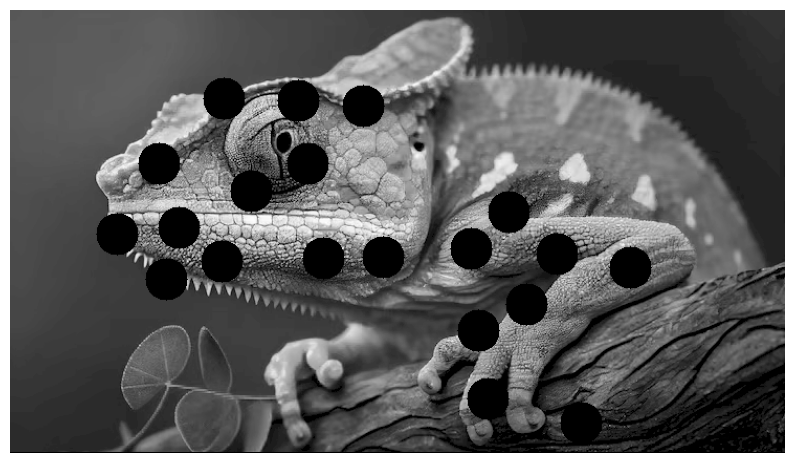

In [14]:
corners = cv2.goodFeaturesToTrack(gray_img, maxCorners=50,
                qualityLevel=0.3, minDistance=50)
corners = corners.astype(np.int32)

for c in corners:
    x, y = c.ravel()
    img = cv2.circle(gray_img, center=(x, y), radius=20,
                    color=(0, 0, 255), thickness=-1)

img_output = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img_output)
plt.axis('off')
plt.show()


### HARRIS CORNER DETECTION

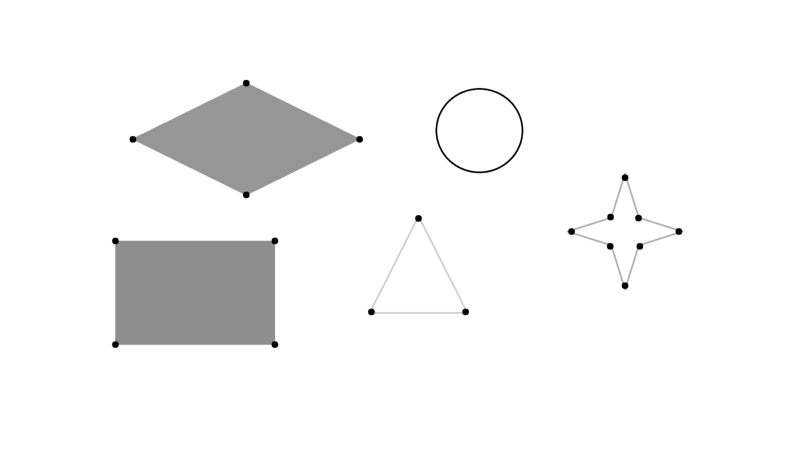

In [15]:
gray_img = cv2.imread("shapes.png",0)

corners = cv2.goodFeaturesToTrack(gray_img, maxCorners=50,
                qualityLevel=0.01, minDistance=50,
                useHarrisDetector=True, k=0.1)
corners = corners.astype(np.int32)

for c in corners:
    x, y = c.ravel()
    img = cv2.circle(gray_img, center=(x, y), radius=10,
                    color=(0, 254, 0), thickness=-1)

img_output = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img_output)
plt.axis('off')
plt.show()

## (To Do) Self-Learning Exercise: Understanding Basic Feature Extraction (HOG) for Students

Objective: In this self-guided exercise, you’ll learn about basic feature extraction using the Histogram of Oriented Gradients (HOG) method without prior instruction. HOG is a popular technique to detect and describe the structure of objects in images by analyzing the distribution of gradient orientations. Through this hands-on activity, you’ll implement HOG, apply it to a noisy colorful image, and observe its effects. This will help you understand how features are extracted and why they’re useful in tasks like object recognition.

> **Note:** please do more research on HOG method.


**Now step by step implement the code**

Setup Environment:
* **Load and Prepare the Image**

    * Use the noisy colorful image provided (e.g., `noisy_color_image.png` generated earlier).

    * Convert it to grayscale since HOG works best with grayscale
* **Apply HOG:**

    * Use the `skimage.feature.hog `function to extract HOG features. Start with default settings

    * `hog_features` is the feature vector, and `hog_image` is a visual representation.
    
* **Enhance and Display**
    * Normalize the HOG image for better visualization

    * Display the original image and HOG visualization side by side

* **Experiment and Analyze:**

    **Change Parameters**: Try different values for:

    * `orientations` (e.g., 6 or 12) to see how many gradient directions affect the result.
    * `pixels_per_cell` (e.g., (4, 4) or (16, 16)) to adjust cell size.
    * `cells_per_block` (e.g., (1, 1) or (3, 3)) to change block size.

  **Apply Filters First:**
  Before HOG, apply one of the filters you learned (e.g., Gaussian Blur with (5, 5) or Sharpen). Compare the HOG output
* **Self-Reflection Questions:**
  1. What changes do you see in the HOG visualization when you adjust `orientations` or `pixels_per_cell`?
  2. How does applying a filter (like Gaussian Blur) before HOG affect the result? Why?
  3. Why might HOG be useful for object detection in noisy images?
  4. What happens if the image is too noisy or the cell size is too large?

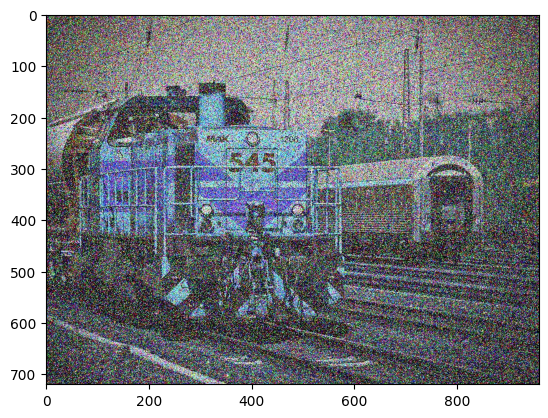

In [16]:
# img = cv2.imread(r"C:\Users\Mohammad\Desktop\Bootcamp\OpenCV\OpenCV_handsOn\noisy_color_image.png") 
img = cv2.imread(r"C:\Users\Mohammad\Desktop\Bootcamp\OpenCV\OpenCV_handsOn\noisy_image.jpg")  
# img = cv2.imread(r"C:\Users\Mohammad\Desktop\Bootcamp\OpenCV\OpenCV_handsOn\sp_img_gray_noise_heavy.png")  
plt.imshow(img)


HOG feature vector length: (121104,)


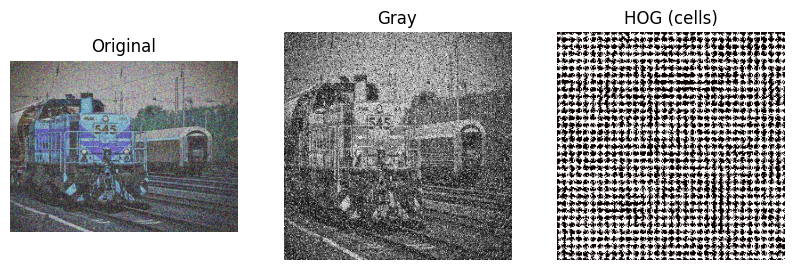

In [45]:
# To Do




def visualize_hog_cells(gray_img, hog_desc_vec, cell_size=(8,8), block_size=(16,16),
                        block_stride=(8,8), nbins=9, scale=5):
    """
    Convert OpenCV HOG descriptor into per-cell histograms and draw orientations.
    Handles 2x2 cells per block with overlapping blocks.
    """
    h, w = gray_img.shape
    cell_w, cell_h = cell_size
    n_cells_x = w // cell_w
    n_cells_y = h // cell_h

    block_w, block_h = block_size
    bsx_cells = block_w // cell_w  # 2
    bsy_cells = block_h // cell_h  # 2

    # Blocks slide one cell at a time if block_stride == cell_size
    stride_x_cells = block_stride[0] // cell_w  # 1
    stride_y_cells = block_stride[1] // cell_h  # 1

    n_blocks_x = (n_cells_x - bsx_cells) // stride_x_cells + 1  # 15
    n_blocks_y = (n_cells_y - bsy_cells) // stride_y_cells + 1  # 15

    # Ensure vector shape (flatten)
    vec = hog_desc_vec.reshape(-1)
    expected_len = n_blocks_y * n_blocks_x * (bsx_cells * bsy_cells * nbins)
    assert vec.size == expected_len, f"Unexpected HOG size {vec.size} vs expected {expected_len}"

    # Accumulate block histograms into cell histograms (because cells appear in multiple blocks)
    cell_hists = np.zeros((n_cells_y, n_cells_x, nbins), dtype=np.float32)
    cell_count = np.zeros((n_cells_y, n_cells_x, 1), dtype=np.float32)

    idx = 0
    for by in range(n_blocks_y):
        for bx in range(n_blocks_x):
            # One block = (2,2,nbins)
            block = vec[idx: idx + bsx_cells*bsy_cells*nbins]
            block = block.reshape(bsy_cells, bsx_cells, nbins)  # (2,2,9)
            idx += bsx_cells*bsy_cells*nbins

            # Top-left cell index for this block
            cy = by * stride_y_cells
            cx = bx * stride_x_cells

            # Add to the 2x2 cells that compose this block
            cell_hists[cy:cy+bsy_cells, cx:cx+bsx_cells, :] += block
            cell_count[cy:cy+bsy_cells, cx:cx+bsx_cells, :] += 1.0

    # Average where cells were covered by multiple blocks
    cell_count[cell_count == 0] = 1.0
    cell_hists /= cell_count

    # Create visualization image
    vis = np.zeros((h, w), dtype=np.float32)

    # Angles for bins in radians (unsigned gradients: 0..180°)
    angles = np.arange(nbins) * np.pi / nbins

    for cy in range(n_cells_y):
        for cx in range(n_cells_x):
            hist = cell_hists[cy, cx]
            # Normalize for nicer drawing
            if hist.sum() > 0:
                hist = hist / (hist.max() + 1e-6)
            center_x = int(cx * cell_w + cell_w/2)
            center_y = int(cy * cell_h + cell_h/2)
            for mag, ang in zip(hist, angles):
                dx = int(scale * mag * np.cos(ang))
                dy = int(scale * mag * np.sin(ang))
                cv2.line(vis,
                         (center_x - dx, center_y - dy),
                         (center_x + dx, center_y + dy),
                         color=255, thickness=1)
    return vis
# 1) Load or generate a noisy colorful image
# img = cv2.imread(r"C:\Users\Mohammad\Desktop\Bootcamp\OpenCV\OpenCV_handsOn\noisy_color_image.png")  
img = cv2.imread(r"C:\Users\Mohammad\Desktop\Bootcamp\OpenCV\OpenCV_handsOn\noisy_image.jpg")  
# img = cv2.imread(r"C:\Users\Mohammad\Desktop\Bootcamp\OpenCV\OpenCV_handsOn\sp_img_gray_noise_heavy.png")  



if img is None:
    # synthetic fallback if no image
    img = np.zeros((128,128,3), dtype=np.uint8)
    cv2.putText(img, "HOG", (20,80), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,255), 4)
    # add noise
    noise = np.random.randint(0,50,img.shape, dtype=np.uint8)
    img = cv2.add(img, noise)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize for consistency
win_size = (256,256)

gray = cv2.resize(gray, win_size)

# 2) Setup HOG descriptor
# win_size = (128,128)
block_size = (32,32)
block_stride = (8,8)
cell_size = (8,8)
nbins = 9
hot_scale = 5 # increase to lengthen the glyphs

hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)

# 3) Compute HOG features
hog_features = hog.compute(gray)

print("HOG feature vector length:", hog_features.shape)
hog_vis = visualize_hog_cells(
    gray,
    hog_features,
    cell_size,
    block_size,
    block_stride,
    nbins,
    hot_scale# increase to lengthen the glyphs
)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1); plt.title("Original"); plt.imshow(img); plt.axis("off")
plt.subplot(1,3,2); plt.title("Gray"); plt.imshow(gray, cmap="gray"); plt.axis("off")
plt.subplot(1,3,3); plt.title("HOG (cells)"); plt.imshow(hog_vis, cmap="hot"); plt.axis("off")
plt.show()

What structural details of the image does HOG emphasize?
HOG emphasizes edges and local shapes by capturing where intensity changes (gradients) occur and in what direction. It highlights object contours, corners, and texture patterns while ignoring flat regions.

How does noise affect the HOG visualization?
Noise introduces extra random gradients, which show up as scattered, inconsistent orientations. This can blur the meaningful structure. Pre-processing (like Gaussian blur or denoising) helps reduce this effect.

Compare results with different cell/block sizes — which settings better preserve meaningful structure?

Smaller cells (e.g., 8×8): capture fine details and edges but are sensitive to noise.

Larger cells (e.g., 16×16): smooth over details, capturing broader structure but losing precision.
Generally, 8×8 cells with 2×2 blocks balance detail and robustness.

Why might HOG be useful in tasks like pedestrian detection or object recognition?
Because HOG encodes shape and contour information that is fairly robust to illumination and color changes. Human silhouettes or object outlines have consistent gradient structures, making HOG reliable for detection.